In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
df = pd.read_csv('online_shoppers_intention.csv')
df.length = len(df)
print(f"Total number of rows in the dataset: {df.length}")

Total number of rows in the dataset: 12330


In [6]:
#check if any duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Number of duplicate rows: {duplicates}")

# remove duplicates
df = df.drop_duplicates()


Number of duplicate rows: 125


In [7]:
#mean max min mode of numerical columns, make it aesthecially pleasing
def describe_numerical_columns(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    description = {}
    for col in numerical_cols:
        description[col] = {
            'mean': df[col].mean(),
            'max': df[col].max(),
            'min': df[col].min(),
            'mode': df[col].mode()[0]
        }
    return pd.DataFrame(description)
numerical_description = describe_numerical_columns(df)
numerical_description

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.02037,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.20000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
mode,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.200000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000


In [8]:
#remove outliers and shows me before and after rows
#Note: not good to remove outliers, some data have 2 ends
'''def remove_outliers(df, threshold=3):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        mean = df[col].mean()
        std = df[col].std()
        df = df[(df[col] >= mean - threshold * std) & (df[col] <= mean + threshold * std)]
    return df
before_rows = df.shape[0]
df = remove_outliers(df)
after_rows = df.shape[0]
print(f"Rows before removing outliers: {before_rows}, Rows after removing outliers: {after_rows}")'''

'def remove_outliers(df, threshold=3):\n    numerical_cols = df.select_dtypes(include=[\'float64\', \'int64\']).columns\n    for col in numerical_cols:\n        mean = df[col].mean()\n        std = df[col].std()\n        df = df[(df[col] >= mean - threshold * std) & (df[col] <= mean + threshold * std)]\n    return df\nbefore_rows = df.shape[0]\ndf = remove_outliers(df)\nafter_rows = df.shape[0]\nprint(f"Rows before removing outliers: {before_rows}, Rows after removing outliers: {after_rows}")'

In [9]:
numerical_description = describe_numerical_columns(df)
numerical_description

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.02037,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.20000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
mode,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.200000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000


In [10]:
#class distribution
def class_distribution(df, target_col):
    return df[target_col].value_counts(normalize=True)
target_col = 'Revenue'
distribution = class_distribution(df, target_col)
distribution

Revenue
False    0.843671
True     0.156329
Name: proportion, dtype: float64

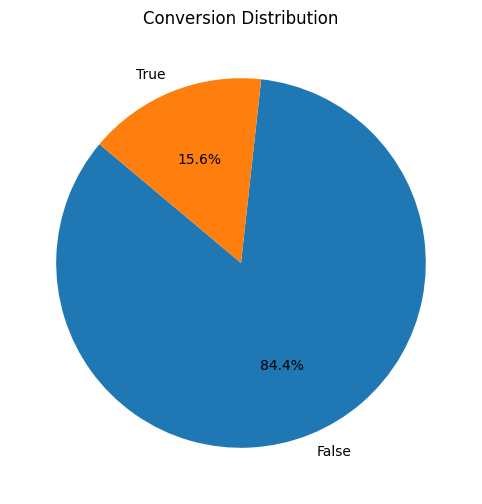

In [11]:
#percentage of conversion (revenue = True)in piechart
def plot_conversion_distribution(df, target_col):
    distribution = df[target_col].value_counts(normalize=True)
    plt.figure(figsize=(8, 6))
    plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140)
    plt.title('Conversion Distribution')
    plt.show()
plot_conversion_distribution(df, target_col)

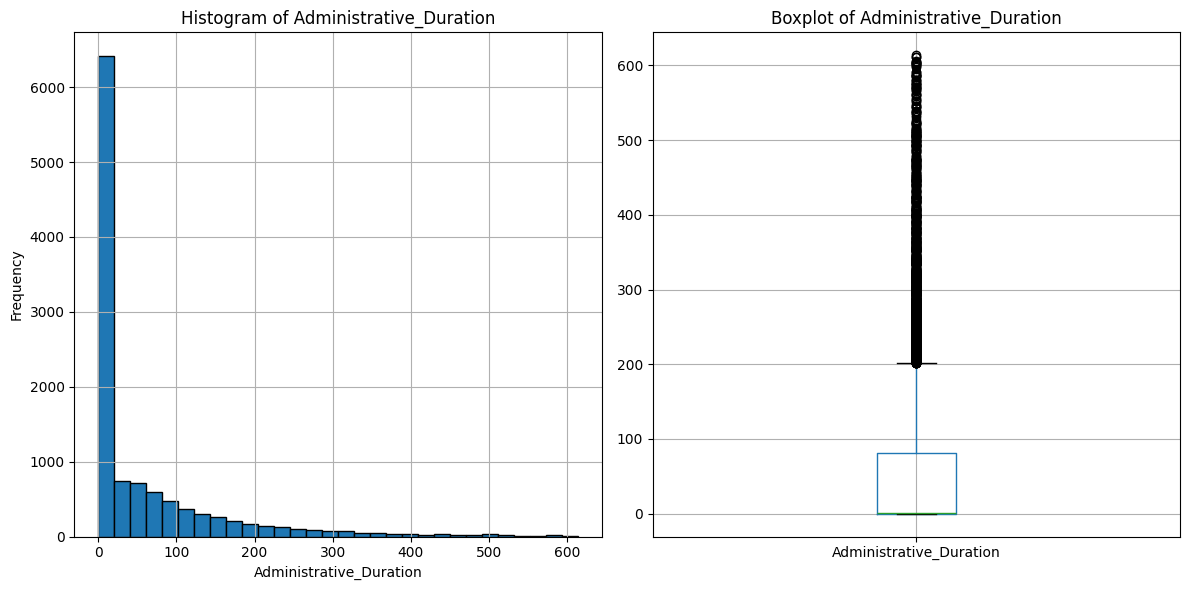

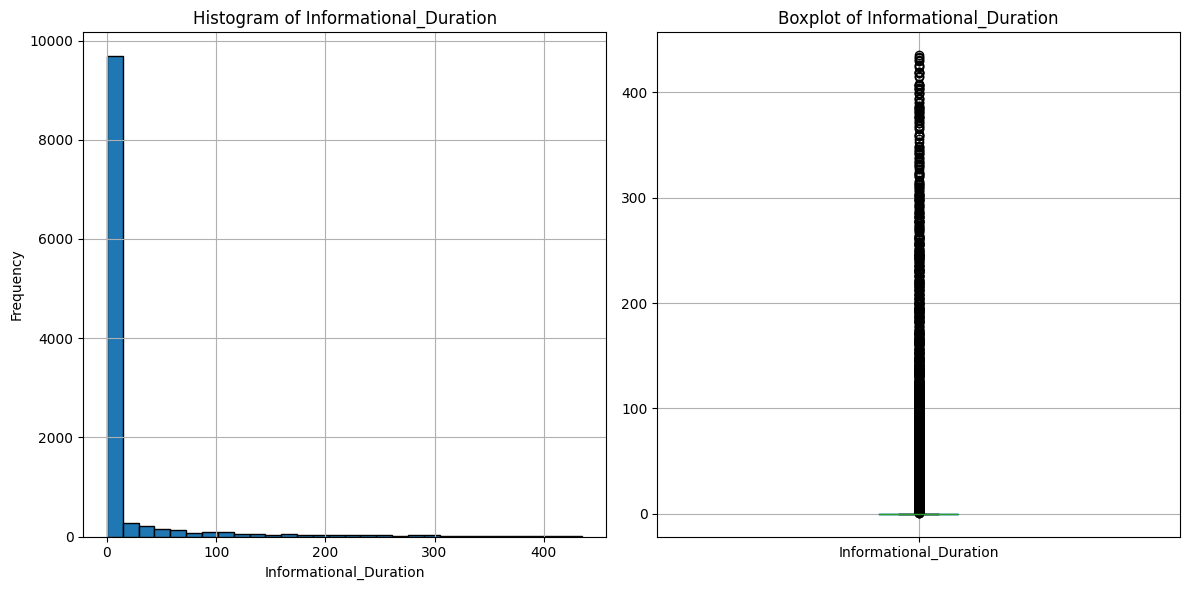

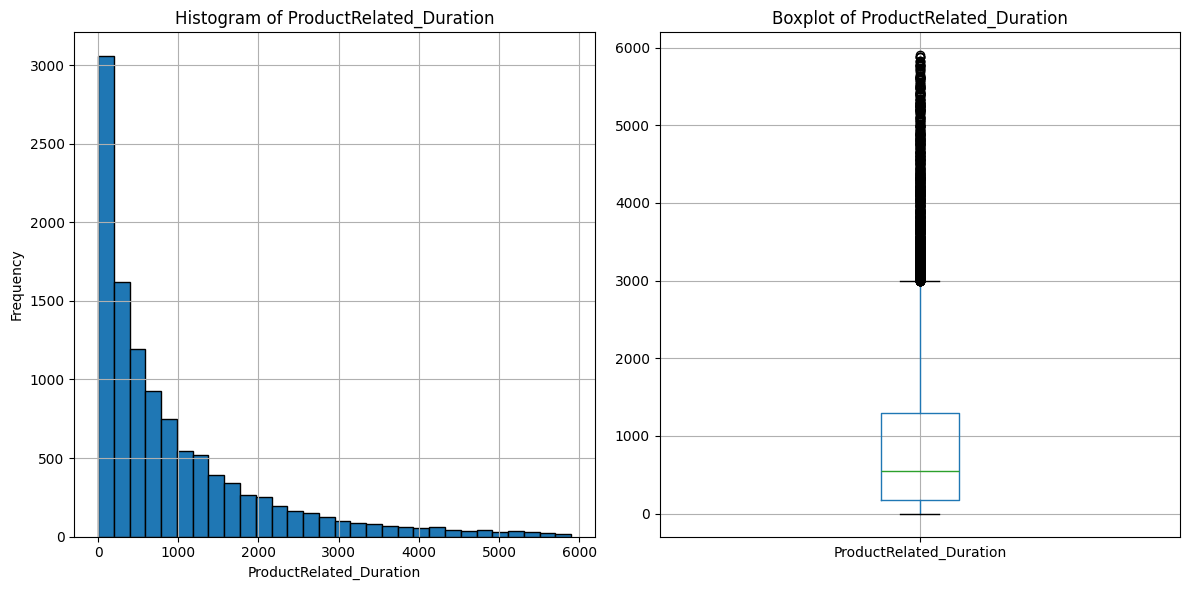

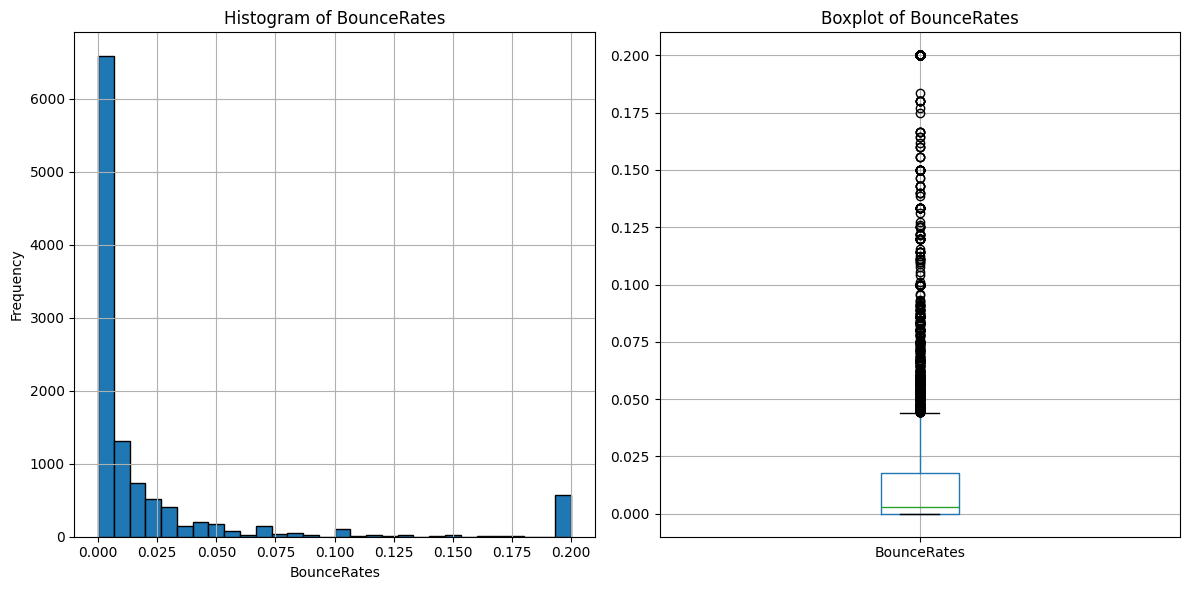

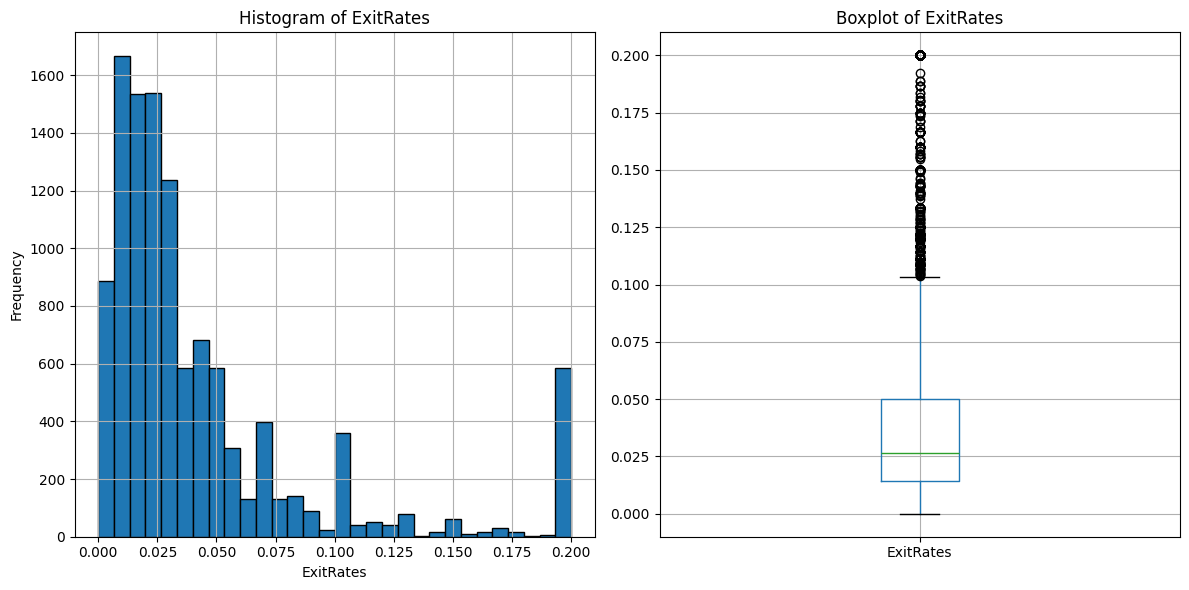

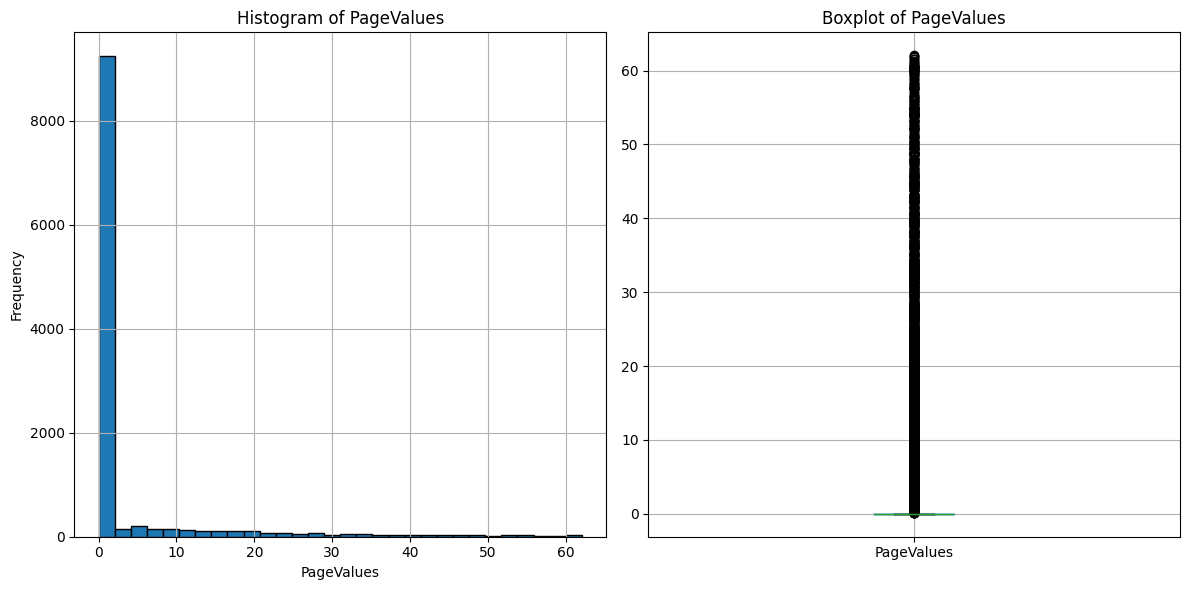

In [12]:
#Distribution plots
def plot_numerical_distributions(df, cols):
    for col in cols:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        df[col].hist(bins=30, edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        df.boxplot(column=col)
        plt.title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()
numerical_cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 
                 'BounceRates', 'ExitRates', 'PageValues']

#Remove Outliers Administrative_Duration, Informational_Duration, ProductRelated_Duration, Page values, do not remove BounceRates, ExitRates
def remove_outliers(df, cols, threshold=3):
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        df = df[(df[col] >= mean - threshold * std) & (df[col] <= mean + threshold * std)]
    return df
cols_to_remove_outliers = ['Administrative_Duration', 'Informational_Duration', 
                            'ProductRelated_Duration', 'PageValues']
before_rows = df.shape[0]
df = remove_outliers(df, cols_to_remove_outliers)
plot_numerical_distributions(df, numerical_cols)


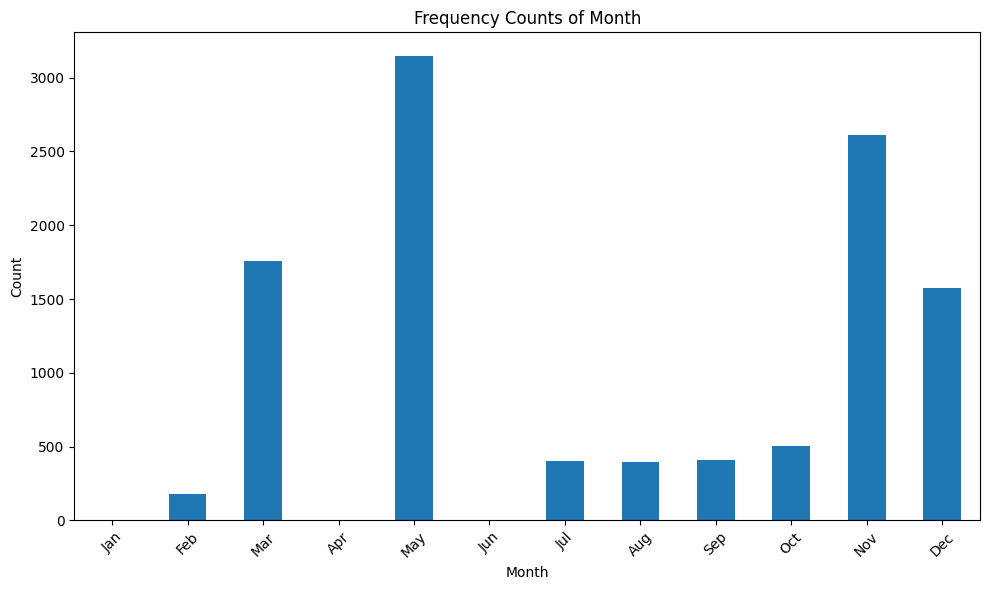

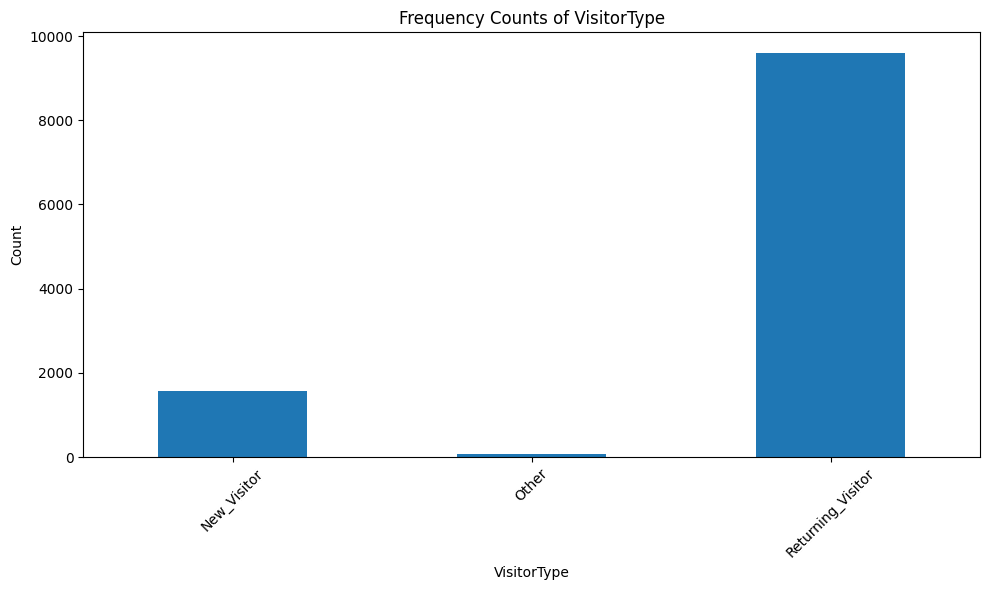

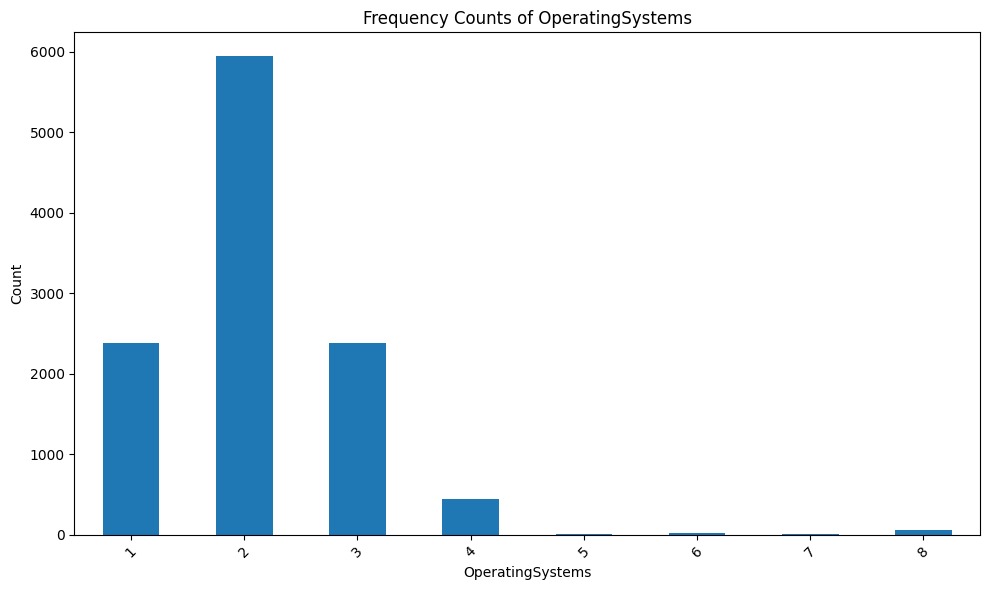

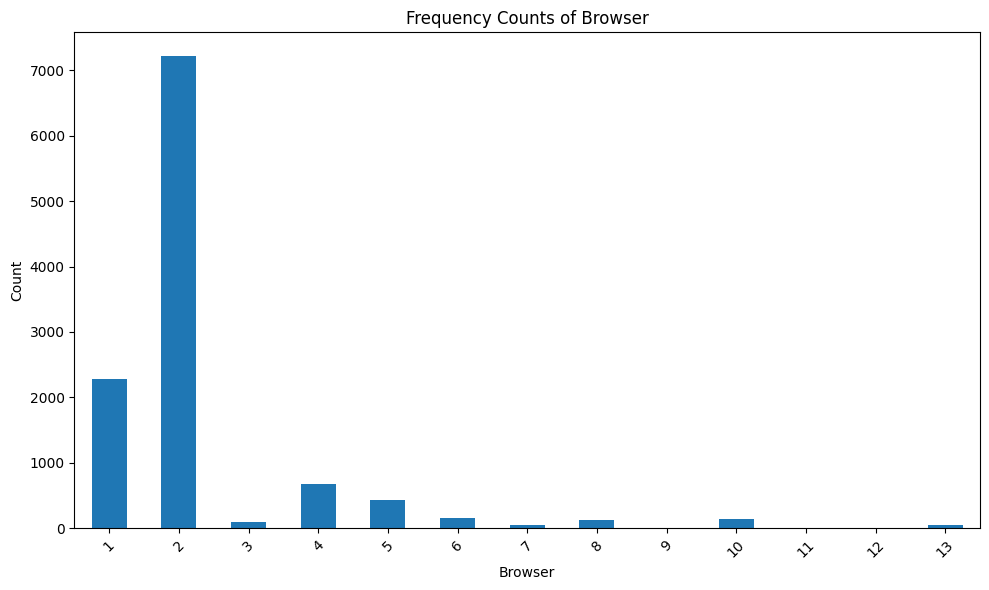

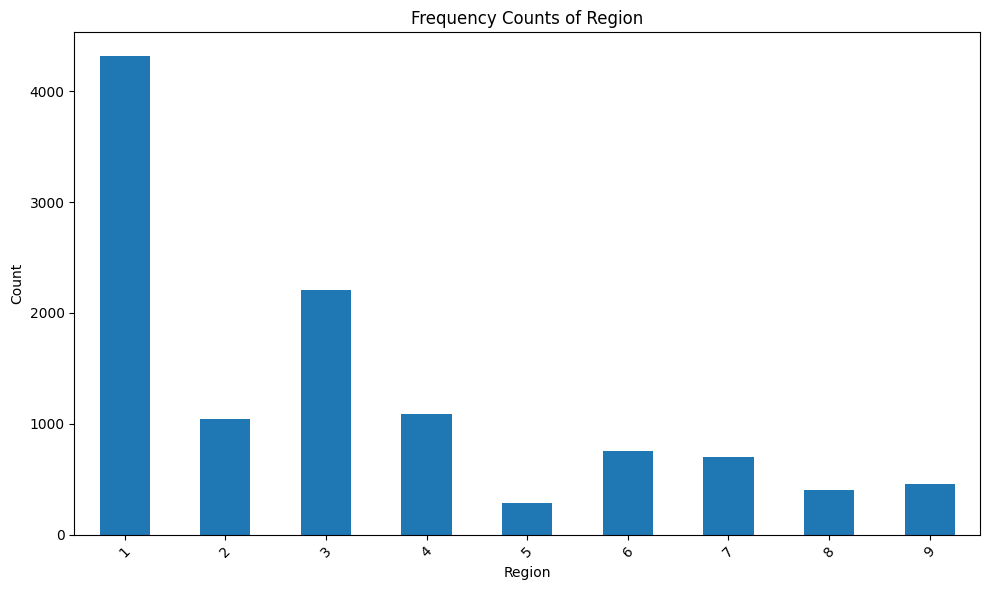

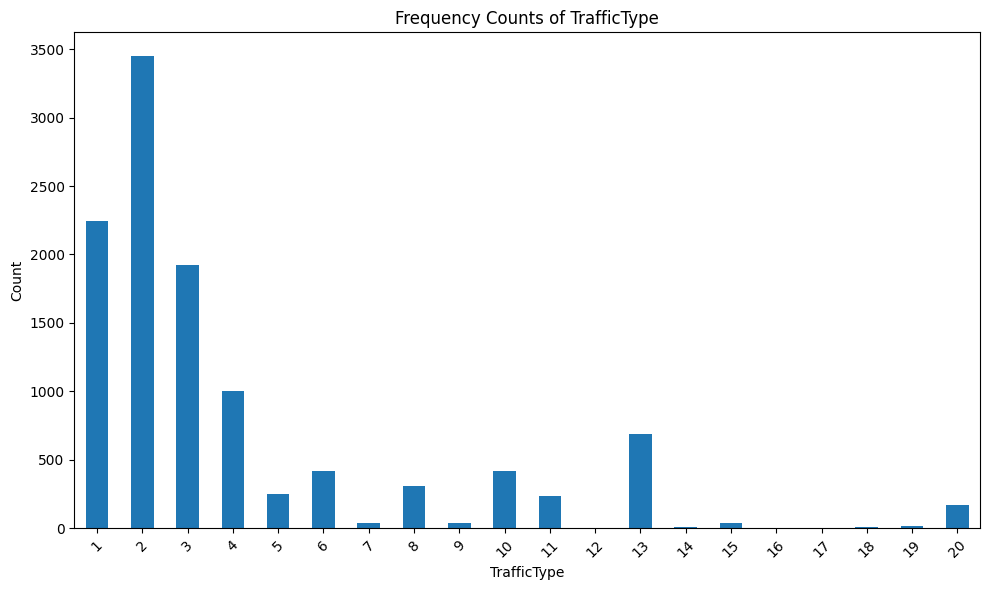

In [13]:
#frequency counts of categorical columns, make month in order from january to december
def plot_categorical_counts(df, cols):
    for col in cols:
        plt.figure(figsize=(10, 6))
        if col == 'Month':
            month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            df[col] = pd.Categorical(df[col], categories=month_order, ordered=True)
        df[col].value_counts().sort_index().plot(kind='bar')
        plt.title(f'Frequency Counts of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
categorical_cols = ['Month', 'VisitorType', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
plot_categorical_counts(df, categorical_cols)

#Month: No Jan, Apr, Jun

In [14]:
#make split train data for bouncerates
def split_train_data(df, target_col):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split_train_data(df, 'BounceRates')

In [15]:
# One-hot encode categorical features for both train and test sets
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align the columns of train and test sets
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Linear regression model for BounceRates (should use regression, not classification)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def train_linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model = train_linear_regression(X_train_encoded, y_train)

# Evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

mse, r2 = evaluate_model(model, X_test_encoded, y_test)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 0.0004
R^2 Score: 0.8132


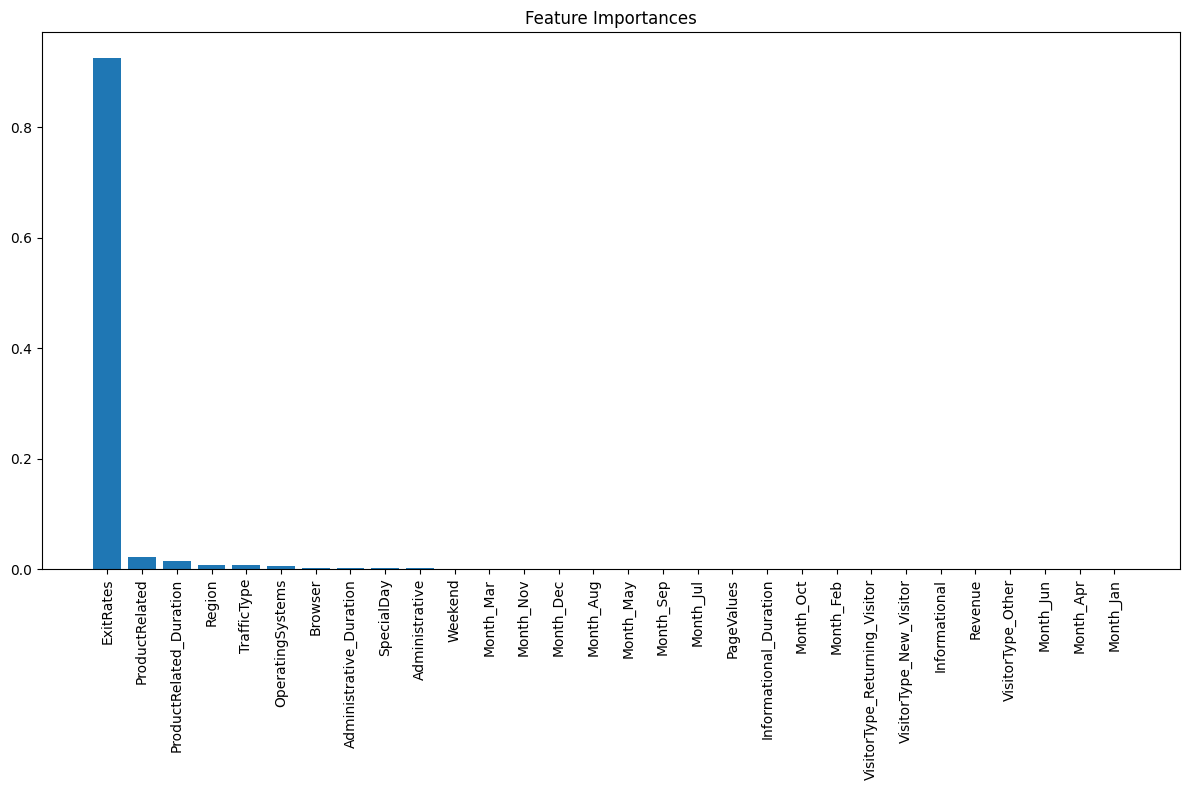

Random Forest Model Mean Squared Error: 0.00017
Random Forest Model R^2 Score: 0.9240


In [16]:
# Use RandomForestRegressor for continuous target
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Feature importance for Random Forest Regressor
def train_random_forest(X_train, y_train):
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model

rf_model = train_random_forest(X_train_encoded, y_train)

# Feature importance
def plot_feature_importance(model, X_train):
    importances = model.feature_importances_
    feature_names = X_train.columns
    indices = importances.argsort()[::-1]

    plt.figure(figsize=(12, 8))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf_model, X_train_encoded)

# Predicting BounceRates using Random Forest Regressor
def predict_bouncerates(model, X_test):
    return model.predict(X_test)

y_pred_rf = predict_bouncerates(rf_model, X_test_encoded)

# Evaluate Random Forest Regressor model
def evaluate_rf_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

mse_rf, r2_rf = evaluate_rf_model(rf_model, X_test_encoded, y_test)
print(f"Random Forest Model Mean Squared Error: {mse_rf:.5f}")
print(f"Random Forest Model R^2 Score: {r2_rf:.4f}")

C:\Users\khidi\AppData\Local\Temp\ipykernel_20244\1289626897.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(categorical_col)[target_col].mean().sort_values().plot(kind='bar')


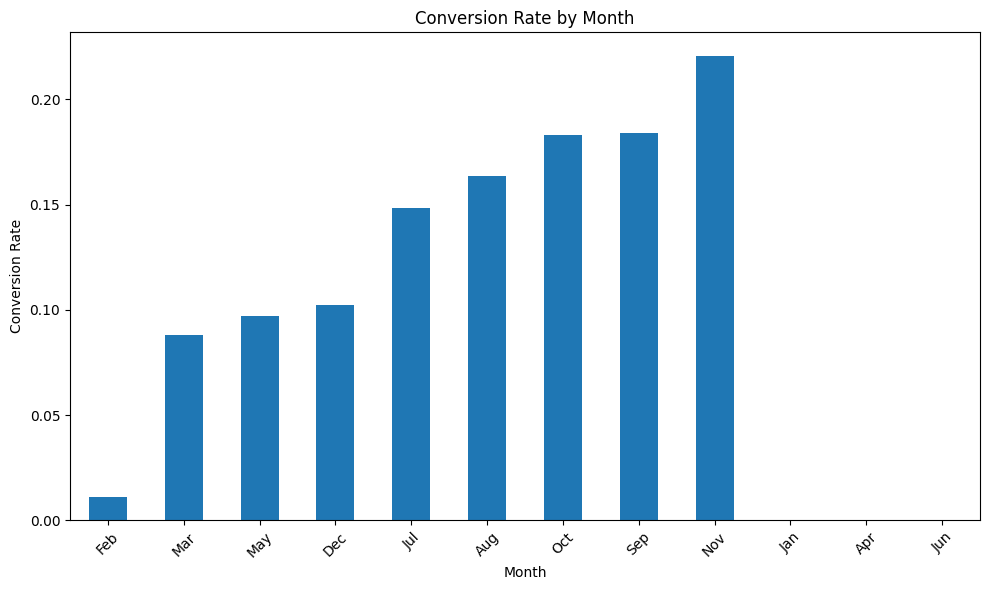

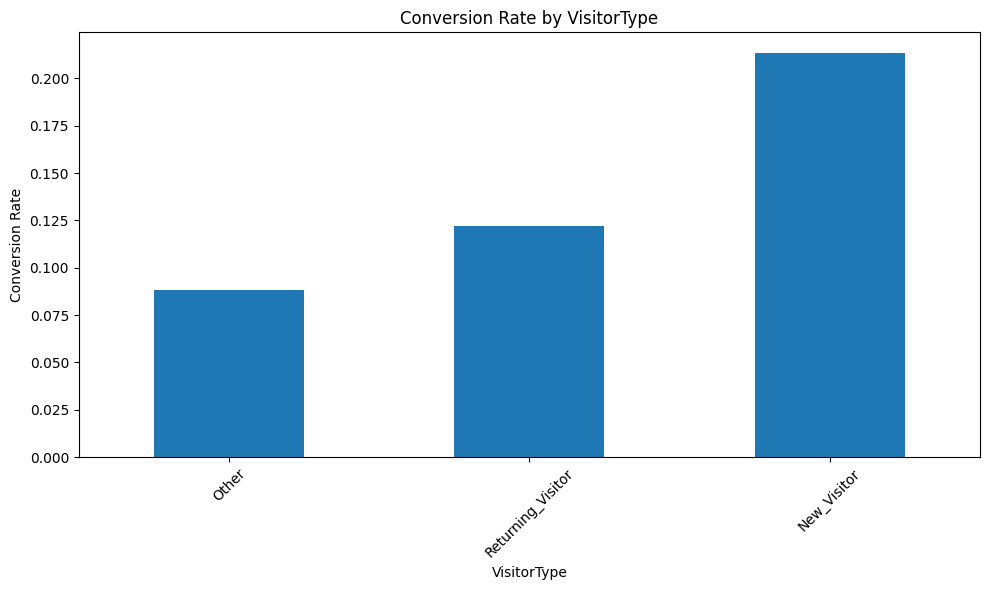

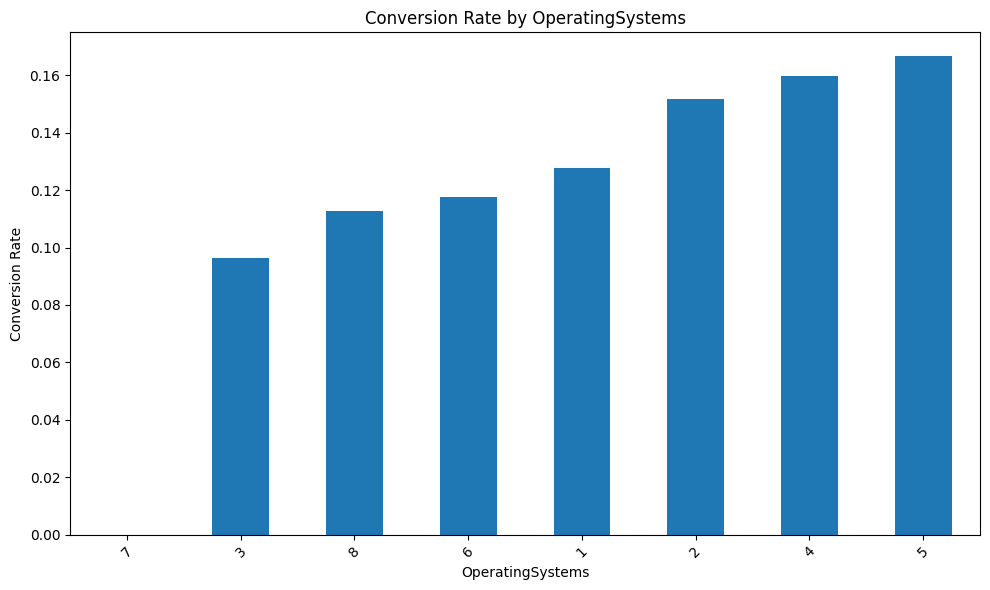

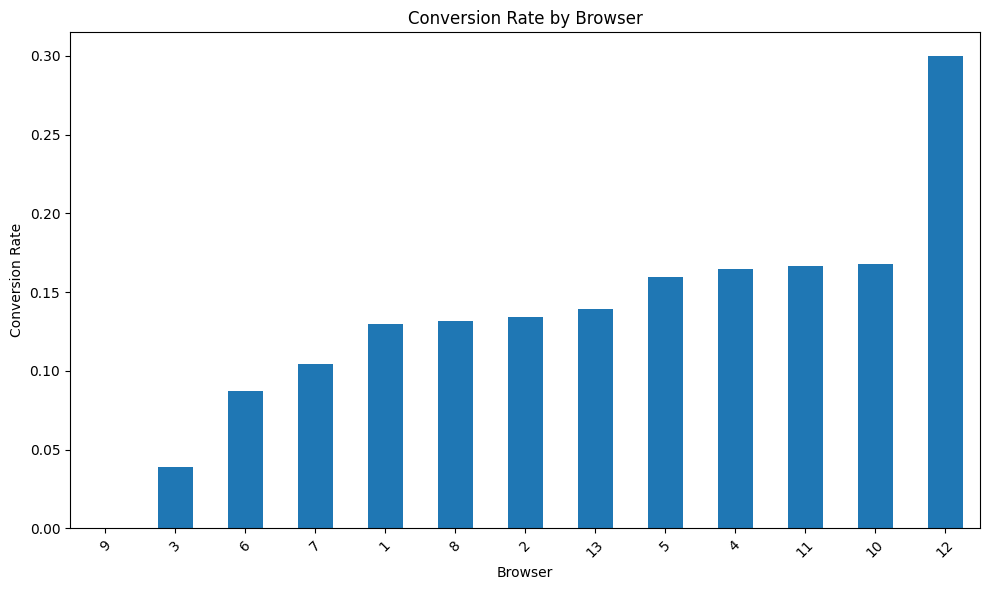

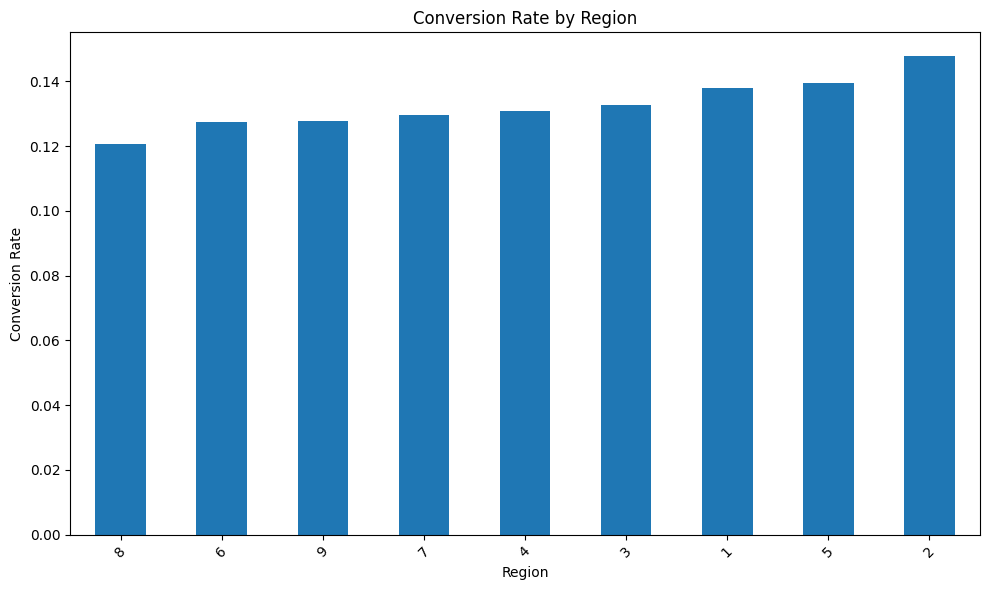

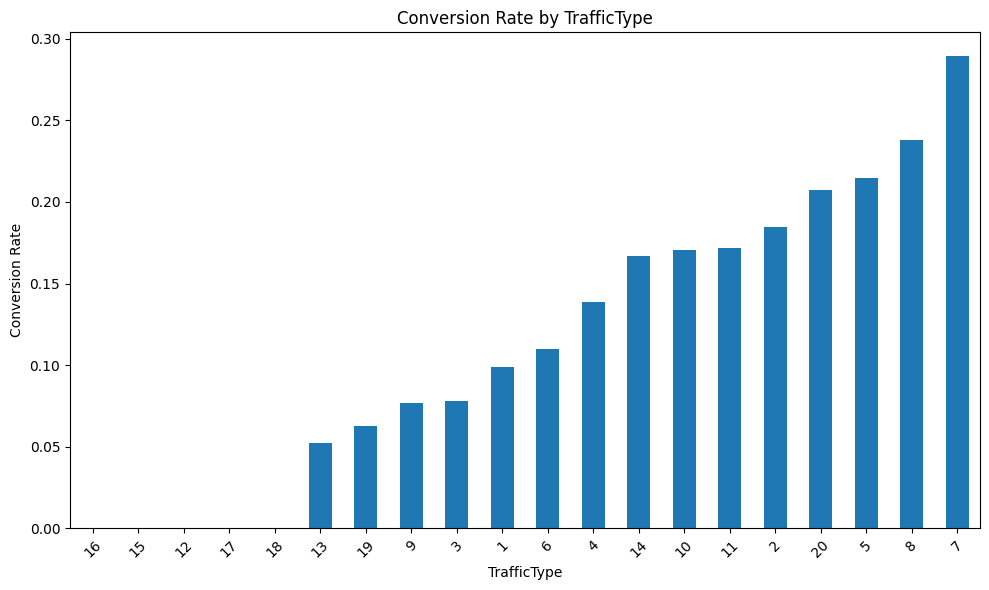

In [17]:
# Relationship between categorical variables and Revenue (conversion rates)
def plot_categorical_vs_revenue(df, categorical_col, target_col='Revenue'):
    plt.figure(figsize=(10, 6))
    df.groupby(categorical_col)[target_col].mean().sort_values().plot(kind='bar')
    plt.title(f'Conversion Rate by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel('Conversion Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
categorical_cols = ['Month', 'VisitorType', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
for col in categorical_cols:
    plot_categorical_vs_revenue(df, col, target_col)

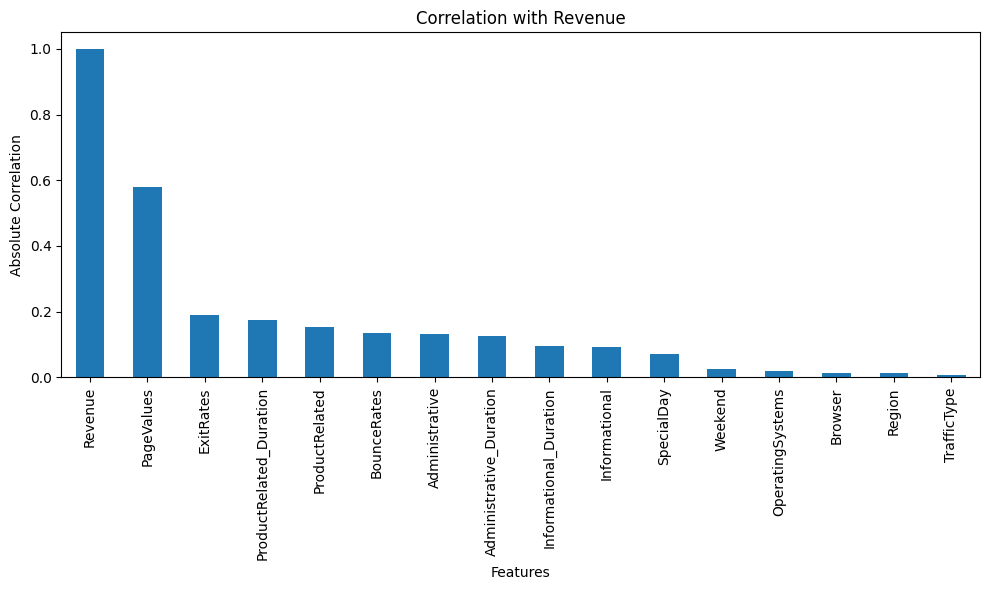

In [18]:
# features correlate most with Revenue, convert to ABS values
def plot_correlation_with_revenue(df, target_col='Revenue'):
    # Only use numerical columns for correlation
    numerical_df = df.select_dtypes(include=['float64', 'int64', 'bool'])
    correlation = numerical_df.corr()[target_col].abs().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    correlation.plot(kind='bar')
    plt.title(f'Correlation with {target_col}')
    plt.xlabel('Features')
    plt.ylabel('Absolute Correlation')
    plt.tight_layout()
    plt.show()
plot_correlation_with_revenue(df, target_col)

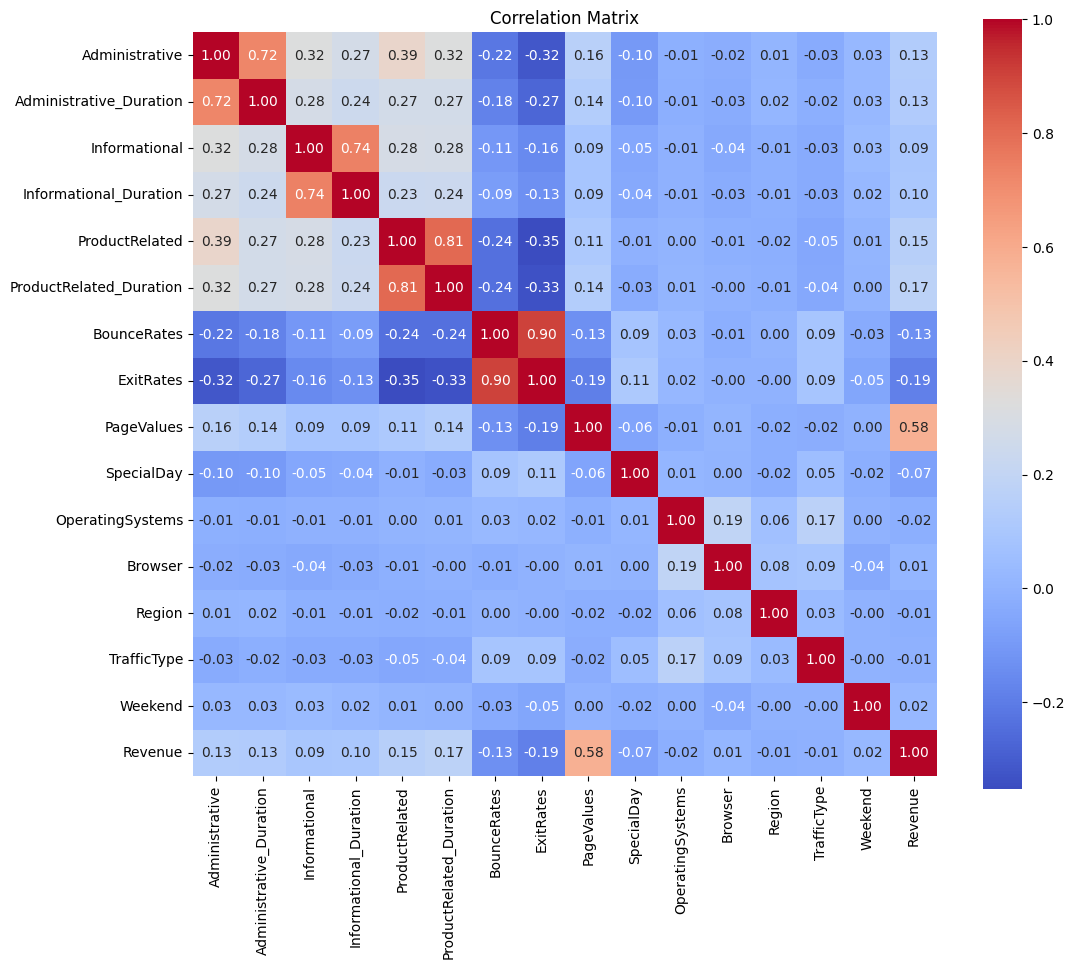

In [19]:
# Correlation matrix/heatmap of numerical features
def plot_correlation_matrix(df):
    # Select only numerical columns
    numerical_df = df.select_dtypes(include=['float64', 'int64', 'bool'])
    plt.figure(figsize=(12, 10))
    correlation_matrix = numerical_df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.show()
plot_correlation_matrix(df)

In [20]:
# multicollinearity between features (only numerical columns)
def check_multicollinearity(df, threshold=0.8):
    numerical_df = df.select_dtypes(include=['float64', 'int64', 'bool'])
    correlation_matrix = numerical_df.corr()
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
    return high_corr_pairs

high_corr_pairs = check_multicollinearity(df)
if high_corr_pairs:
    print("High correlation pairs (multicollinearity):")
    for pair in high_corr_pairs:
        print(pair)

# Remove multicollinearity by dropping one of the correlated features (only numerical columns)
def remove_multicollinearity(df, threshold=0.8):
    numerical_cols = df.select_dtypes(include=['float64', 'int64', 'bool']).columns
    correlation_matrix = df[numerical_cols].corr()
    to_drop = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                to_drop.add(colname)
    return df.drop(columns=to_drop) 

df = remove_multicollinearity(df)

High correlation pairs (multicollinearity):
('ProductRelated_Duration', 'ProductRelated')
('ExitRates', 'BounceRates')


Classification Model Accuracy: 0.9063
Feature Importances (sorted):
PageValues: 0.4123
Month_Nov: 0.0817
ProductRelated: 0.0753
BounceRates: 0.0646
Administrative_Duration: 0.0532
VisitorType_New_Visitor: 0.0344
Administrative: 0.0312
OperatingSystems: 0.0304
TrafficType: 0.0289
Region: 0.0277
VisitorType_Returning_Visitor: 0.0203
Informational_Duration: 0.0189
Browser: 0.0181
Weekend: 0.0180
Month_Dec: 0.0136
Month_May: 0.0122
Informational: 0.0117
Month_Sep: 0.0093
Month_Mar: 0.0091
Month_Oct: 0.0088
SpecialDay: 0.0068
Month_Jul: 0.0065
Month_Aug: 0.0061
VisitorType_Other: 0.0006
Month_Feb: 0.0003
Month_Jun: 0.0000
Month_Apr: 0.0000
Month_Jan: 0.0000


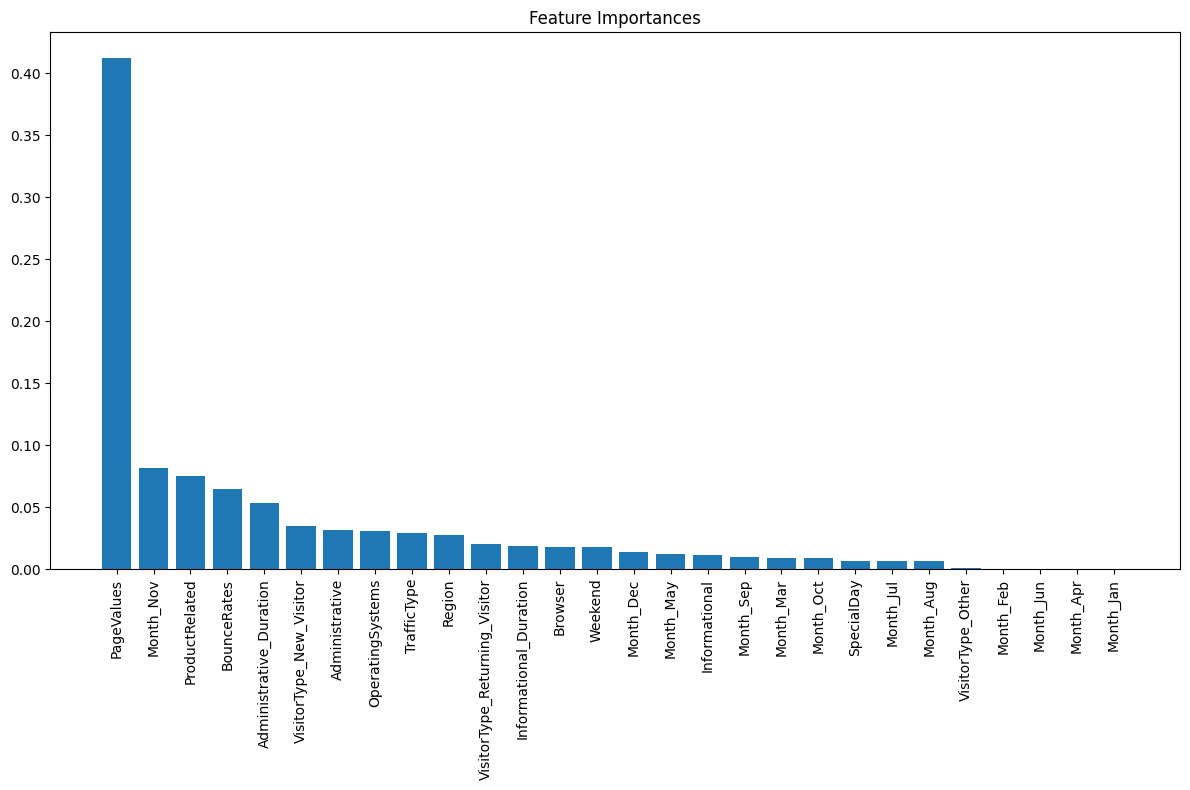

In [21]:
#Prepare data and handle class imbalance for classification tasks
def prepare_data(df, target_col='Revenue'):
    # Split into X/y
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # One-hot encode categorical features
    X_encoded = pd.get_dummies(X)
    
    # Split into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test
def handle_class_imbalance(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled
X_train, X_test, y_train, y_test = prepare_data(df, target_col='Revenue')
X_train_resampled, y_train_resampled = handle_class_imbalance(X_train, y_train)

# Train a Classification model (e.g., Random Forest)
def train_classification_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model
classification_model = train_classification_model(X_train_resampled, y_train_resampled)
# Evaluate the Classification model
def evaluate_classification_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy
accuracy = evaluate_classification_model(classification_model, X_test, y_test)
print(f"Classification Model Accuracy: {accuracy:.4f}")
# Plot feature importance for the classification model
def plot_classification_feature_importance(model, X_train):
    importances = model.feature_importances_
    feature_names = X_train.columns
    indices = importances.argsort()[::-1]

    # Print feature importances
    print("Feature Importances (sorted):")
    for idx in indices:
        print(f"{feature_names[idx]}: {importances[idx]:.4f}")
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
    plt.tight_layout()
    plt.show()
plot_classification_feature_importance(classification_model, X_train_resampled)
# Predicting Revenue using the Classification model
def predict_revenue(model, X_test):
    return model.predict(X_test)
y_pred_classification = predict_revenue(classification_model, X_test)
# Evaluate the Classification model
def evaluate_classification_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy
accuracy_classification = evaluate_classification_model(classification_model, X_test, y_test)

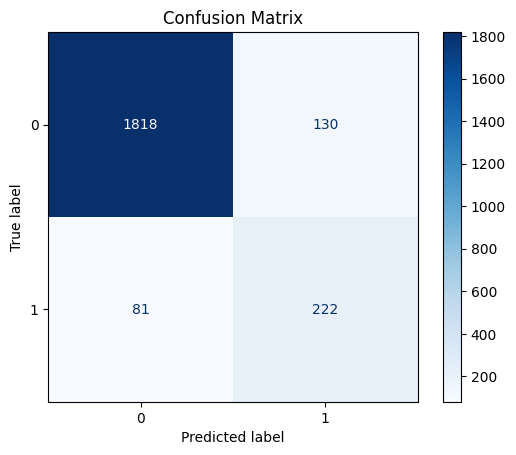

Average Precision Score: 0.6789


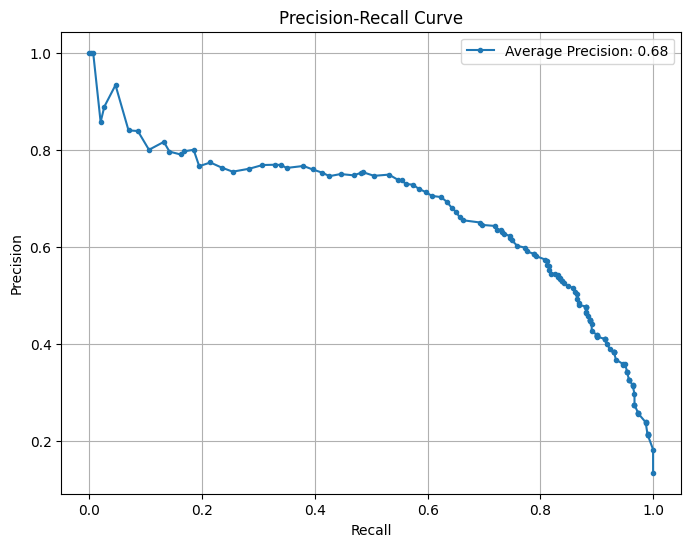

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#confusion matrix for classification model
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(classification_model, X_test, y_test)

#precision-recall curve for classification model
from sklearn.metrics import precision_recall_curve, average_precision_score
def plot_precision_recall_curve(model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    average_precision = average_precision_score(y_test, y_scores)

    # Print statement
    print(f"Average Precision Score: {average_precision:.4f}")

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label=f'Average Precision: {average_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()

plot_precision_recall_curve(classification_model, X_test, y_test)

In [23]:
"""#hyperparameter tuning for classification model
from sklearn.model_selection import GridSearchCV
def hyperparameter_tuning(model, X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False],
        'class_weight': [None, 'balanced']
    }
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_
best_model, best_params = hyperparameter_tuning(classification_model, X_train_resampled, y_train_resampled)
print("Best Hyperparameters:", best_params)

# Evaluate the best model
accuracy_best_model = evaluate_classification_model(best_model, X_test, y_test)
print(f"Best Model Accuracy: {accuracy_best_model:.4f}")"""

'#hyperparameter tuning for classification model\nfrom sklearn.model_selection import GridSearchCV\ndef hyperparameter_tuning(model, X_train, y_train):\n    param_grid = {\n        \'n_estimators\': [50, 100, 200],\n        \'max_depth\': [None, 10, 20],\n        \'min_samples_split\': [2, 5, 10],\n        \'min_samples_leaf\': [1, 2, 4],\n        \'max_features\': [\'auto\', \'sqrt\', \'log2\'],\n        \'bootstrap\': [True, False],\n        \'class_weight\': [None, \'balanced\']\n    }\n    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring=\'accuracy\', n_jobs=-1)\n    grid_search.fit(X_train, y_train)\n    return grid_search.best_estimator_, grid_search.best_params_\nbest_model, best_params = hyperparameter_tuning(classification_model, X_train_resampled, y_train_resampled)\nprint("Best Hyperparameters:", best_params)\n\n# Evaluate the best model\naccuracy_best_model = evaluate_classification_model(best_model, X_test, y_test)\nprint(f"Best Model Accura

In [24]:
# XGBoost model for classification
def train_xgboost_model(X_train, y_train):
    model = XGBClassifier(eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    return model
model_xgboost = train_xgboost_model(X_train_resampled, y_train_resampled)
# Evaluate the XGBoost model
def evaluate_xgboost_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy
accuracy_xgboost = evaluate_xgboost_model(model_xgboost, X_test, y_test)
print(f"XGBoost Model Accuracy: {accuracy_xgboost:.4f}")


XGBoost Model Accuracy: 0.9005


In [25]:
"""from sklearn.model_selection import RandomizedSearchCV

def hyperparameter_tuning_xgboost(model, X_train, y_train):
    param_distributions = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.5, 0.7, 1.0],
        'colsample_bytree': [0.5, 0.7, 1.0],
        'gamma': [0, 0.1, 0.2],
        'reg_alpha': [0, 0.1, 1],
        'reg_lambda': [0, 0.1, 1]
    }

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions,
        n_iter=50,
        scoring='accuracy',
        cv=3,
        verbose=2,
        n_jobs=-1
    )

    random_search.fit(X_train, y_train)

    print("Best XGBoost Hyperparameters:", random_search.best_params_)
    print("Best XGBoost Accuracy from RandomizedSearchCV: {:.4f}".format(random_search.best_score_))

    return random_search.best_estimator_, random_search.best_params_

# Call it
best_xgboost_model, best_xgboost_params = hyperparameter_tuning_xgboost(model_xgboost, X_train_resampled, y_train_resampled)
"""

'from sklearn.model_selection import RandomizedSearchCV\n\ndef hyperparameter_tuning_xgboost(model, X_train, y_train):\n    param_distributions = {\n        \'n_estimators\': [50, 100, 200],\n        \'max_depth\': [3, 6, 9],\n        \'learning_rate\': [0.01, 0.1, 0.2],\n        \'subsample\': [0.5, 0.7, 1.0],\n        \'colsample_bytree\': [0.5, 0.7, 1.0],\n        \'gamma\': [0, 0.1, 0.2],\n        \'reg_alpha\': [0, 0.1, 1],\n        \'reg_lambda\': [0, 0.1, 1]\n    }\n\n    random_search = RandomizedSearchCV(\n        estimator=model,\n        param_distributions=param_distributions,\n        n_iter=50,\n        scoring=\'accuracy\',\n        cv=3,\n        verbose=2,\n        n_jobs=-1\n    )\n\n    random_search.fit(X_train, y_train)\n\n    print("Best XGBoost Hyperparameters:", random_search.best_params_)\n    print("Best XGBoost Accuracy from RandomizedSearchCV: {:.4f}".format(random_search.best_score_))\n\n    return random_search.best_estimator_, random_search.best_params_\n

In [26]:
# XGBoost model for classification using best hyperparameters 'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0
def train_best_xgboost_model(X_train, y_train, params):
    model = XGBClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        gamma=params['gamma'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        eval_metric='logloss',
        random_state=42
    )
    model.fit(X_train, y_train)
    return model    
def best_xgboost_params():
    return {
        'n_estimators': 100,
        'max_depth': 9,
        'learning_rate': 0.1,
        'subsample': 0.5,
        'colsample_bytree': 1.0,
        'gamma': 0,
        'reg_alpha': 0.1,
        'reg_lambda': 0
    }
model_best_xgboost = train_best_xgboost_model(X_train_resampled, y_train_resampled, best_xgboost_params())
# Evaluate the best XGBoost model
def evaluate_best_xgboost_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy
accuracy_best_xgboost = evaluate_best_xgboost_model(model_best_xgboost, X_test, y_test)
print(f"Best XGBoost Model Accuracy: {accuracy_best_xgboost:.4f}")



Best XGBoost Model Accuracy: 0.9032


In [27]:
# Overfitting
# Check for overfitting by comparing training and test accuracy
def evaluate_xgboost_accuracy(model, X_train, y_train, X_test, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    return train_accuracy, test_accuracy
train_accuracy_xgboost, test_accuracy_xgboost = evaluate_xgboost_accuracy(model_xgboost, X_train_resampled, y_train_resampled, X_test, y_test)
print(f"XGBoost Model Train Accuracy: {train_accuracy_xgboost:.4f}")
print(f"XGBoost Model Test Accuracy: {test_accuracy_xgboost:.4f}") 


XGBoost Model Train Accuracy: 0.9823
XGBoost Model Test Accuracy: 0.9005


Feature Importances (sorted):
PageValues: 0.1959
Month_Nov: 0.1658
VisitorType_Returning_Visitor: 0.0640
VisitorType_New_Visitor: 0.0594
Month_Dec: 0.0483
Month_Sep: 0.0470
Month_Mar: 0.0389
Month_Oct: 0.0388
Month_Jul: 0.0362
Month_Aug: 0.0348
Weekend: 0.0287
Month_May: 0.0263
OperatingSystems: 0.0222
SpecialDay: 0.0222
Administrative_Duration: 0.0186
ProductRelated: 0.0185
Browser: 0.0184
Administrative: 0.0179
VisitorType_Other: 0.0178
Informational: 0.0167
TrafficType: 0.0165
BounceRates: 0.0162
Informational_Duration: 0.0162
Region: 0.0147
Month_Apr: 0.0000
Month_Jun: 0.0000
Month_Feb: 0.0000
Month_Jan: 0.0000


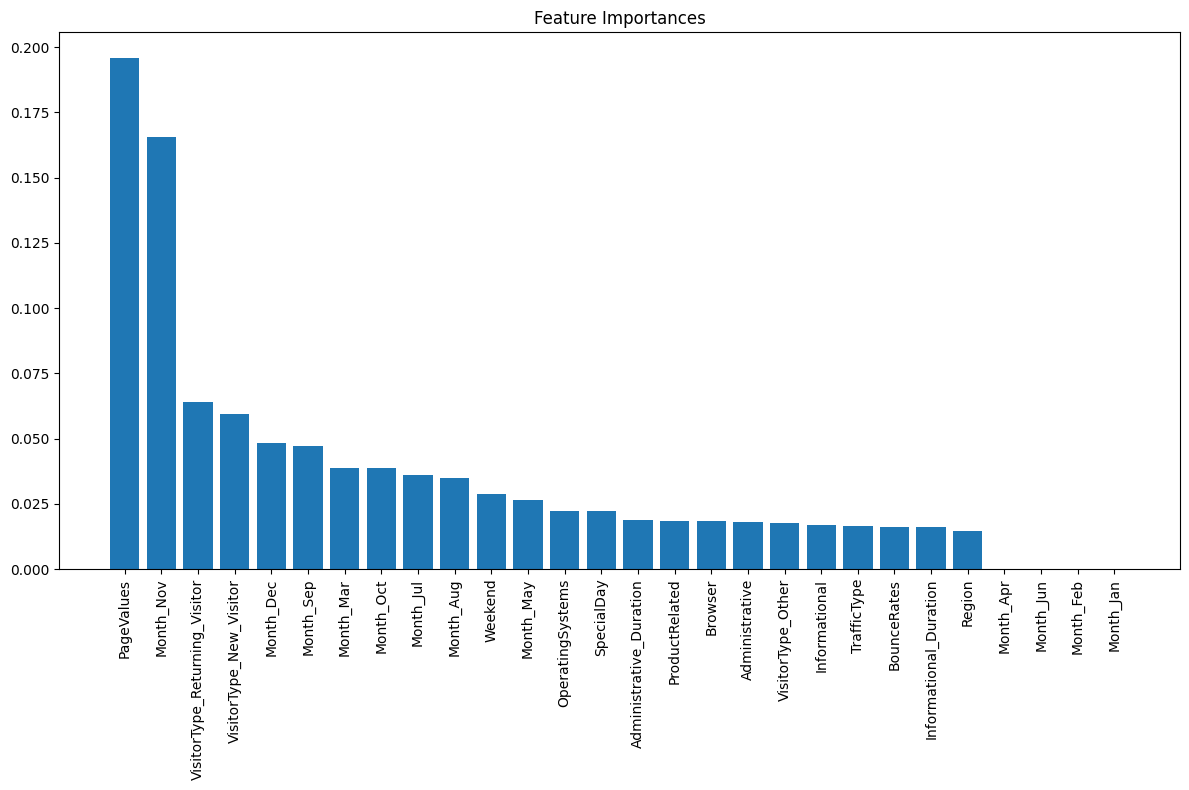

In [28]:
#feature importance for XGBoost model
def plot_xgboost_feature_importance(model, X_train):
    importances = model.feature_importances_
    feature_names = X_train.columns
    indices = importances.argsort()[::-1]

    # Print feature importances
    print("Feature Importances (sorted):")
    for idx in indices:
        print(f"{feature_names[idx]}: {importances[idx]:.4f}")
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
    plt.tight_layout()
    plt.show()
plot_xgboost_feature_importance(model_best_xgboost, X_train_resampled)

In [29]:
# Remove low importance features from XGBoost model
def remove_low_importance_features(model, X_train, threshold=0.01):
    importances = model.feature_importances_
    feature_names = X_train.columns
    important_features = [feature for feature, importance in zip(feature_names, importances) if importance >= threshold]
    return X_train[important_features], important_features
X_train_reduced, important_features = remove_low_importance_features(model_best_xgboost, X_train_resampled)
print(f"Reduced features: {important_features}")


Reduced features: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month_Mar', 'Month_May', 'Month_Jul', 'Month_Aug', 'Month_Sep', 'Month_Oct', 'Month_Nov', 'Month_Dec', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor']


In [30]:
# XGBoost training with best hyperparameters and reduced features
def train_best_xgboost_with_reduced_features(X_train, y_train, important_features):
    X_train_reduced = X_train[important_features]
    model = XGBClassifier(
        n_estimators=100,
        max_depth=9,
        learning_rate=0.1,
        subsample=0.5,
        colsample_bytree=1.0,
        gamma=0,
        reg_alpha=0.1,
        reg_lambda=0,
        eval_metric='logloss',
        random_state=42
    )
    model.fit(X_train_reduced, y_train)
    return model
model_best_xgboost_reduced = train_best_xgboost_with_reduced_features(X_train_reduced, y_train_resampled, important_features)
# Evaluate the best XGBoost model with reduced features
def evaluate_best_xgboost_reduced_model(model, X_test, y_test, important_features):
    X_test_reduced = X_test[important_features]
    y_pred = model.predict(X_test_reduced)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy
accuracy_best_xgboost_reduced = evaluate_best_xgboost_reduced_model(model_best_xgboost_reduced, X_test, y_test, important_features)
print(f"Best XGBoost Model with Reduced Features Accuracy: {accuracy_best_xgboost_reduced:.4f}")

Best XGBoost Model with Reduced Features Accuracy: 0.9032


In [31]:
from sklearn.metrics import recall_score

# Evaluate Accuracy and Recall for XGBoost model
def evaluate_xgboost_accuracy_recall(model, X_train, y_train, X_test, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    train_recall = recall_score(y_train, model.predict(X_train))
    test_recall = recall_score(y_test, model.predict(X_test))
    return train_accuracy, test_accuracy, train_recall, test_recall
# Ensure test data has the same columns as important_features
X_test_reduced = X_test[important_features]

train_accuracy_xgboost, test_accuracy_xgboost, train_recall_xgboost, test_recall_xgboost = evaluate_xgboost_accuracy_recall(
    model_best_xgboost_reduced, X_train_reduced, y_train_resampled, X_test_reduced, y_test
)
print(f"XGBoost Model Train Accuracy: {train_accuracy_xgboost:.4f}")
print(f"XGBoost Model Test Accuracy: {test_accuracy_xgboost:.4f}")
print(f"XGBoost Model Train Recall: {train_recall_xgboost:.4f}")
print(f"XGBoost Model Test Recall: {test_recall_xgboost:.4f}")

XGBoost Model Train Accuracy: 0.9848
XGBoost Model Test Accuracy: 0.9032
XGBoost Model Train Recall: 0.9824
XGBoost Model Test Recall: 0.6997


In [32]:
# Change XGBoost model to reduce overfitting
def train_xgboost_with_reduced_features(X_train, y_train, important_features):
    X_train_reduced = X_train[important_features]
    model = XGBClassifier(
        n_estimators=200,
        max_depth=3,  # Reduced depth to prevent overfitting
        learning_rate=0.01,  # Reduced learning rate
        subsample=0.8,  # Increased subsample to reduce overfitting
        colsample_bytree=0.7,
        gamma=0.3,
        reg_alpha=0.5,
        reg_lambda=2.0,
        eval_metric='logloss',
        random_state=42
    )
    model.fit(X_train_reduced, y_train)
    return model
model_xgboost_reduced = train_xgboost_with_reduced_features(X_train_reduced, y_train_resampled, important_features)
# Evaluate the XGBoost model with reduced features and overfitting prevention
def evaluate_xgboost_reduced_model(model, X_test, y_test, important_features):
    X_test_reduced = X_test[important_features]
    y_pred = model.predict(X_test_reduced)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy
accuracy_xgboost_reduced = evaluate_xgboost_reduced_model(model_xgboost_reduced, X_test, y_test, important_features)

In [33]:
# Accuracy and Recall for XGBoost model
def evaluate_xgboost_accuracy_recall(model, X_train, y_train, X_test, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    train_recall = recall_score(y_train, model.predict(X_train))
    test_recall = recall_score(y_test, model.predict(X_test))
    return train_accuracy, test_accuracy, train_recall, test_recall
train_accuracy_xgboost_reduced, test_accuracy_xgboost_reduced, train_recall_xgboost_reduced, test_recall_xgboost_reduced = evaluate_xgboost_accuracy_recall(
    model_xgboost_reduced, X_train_reduced, y_train_resampled, X_test_reduced, y_test
)
print(f"XGBoost Model with Reduced Features Train Accuracy: {train_accuracy_xgboost_reduced:.4f}")
print(f"XGBoost Model with Reduced Features Test Accuracy: {test_accuracy_xgboost_reduced:.4f}")
print(f"XGBoost Model with Reduced Features Train Recall: {train_recall_xgboost_reduced:.4f}")
print(f"XGBoost Model with Reduced Features Test Recall: {test_recall_xgboost_reduced:.4f}")

#f1 score for XGBoost model
from sklearn.metrics import f1_score
def evaluate_xgboost_f1(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    return train_f1, test_f1
train_f1_xgboost, test_f1_xgboost = evaluate_xgboost_f1(
    model_xgboost_reduced, X_train_reduced, y_train_resampled, X_test_reduced, y_test
)
print(f"XGBoost Model Train F1 Score: {train_f1_xgboost:.4f}")
print(f"XGBoost Model Test F1 Score: {test_f1_xgboost:.4f}")

XGBoost Model with Reduced Features Train Accuracy: 0.8987
XGBoost Model with Reduced Features Test Accuracy: 0.8889
XGBoost Model with Reduced Features Train Recall: 0.9086
XGBoost Model with Reduced Features Test Recall: 0.8449
XGBoost Model Train F1 Score: 0.8997
XGBoost Model Test F1 Score: 0.6719


In [34]:
# Export the final model
import joblib
def export_model(model, filename):
    joblib.dump(model, filename)
    print(f"Model exported to {filename}")
export_model(model_xgboost_reduced, 'xgboost_model.pkl')
#export dataset to csv
def export_dataset(df, filename):
    df.to_csv(filename, index=False)
    print(f"Dataset exported to {filename}")
export_dataset(df, 'online_shoppers_intention_cleaned.csv')

Model exported to xgboost_model.pkl
Dataset exported to online_shoppers_intention_cleaned.csv


In [35]:
df.length = len(df)
print(f"Total number of rows in the dataset: {df.length}")

Total number of rows in the dataset: 11252
